<div style="display: flex; text-align:center; background-color: RGB( 254, 249, 231 );border: 1px solid RGB(51,165,182);" >
<h1 style="margin: auto; padding: 30px;margin-left: 2em; text-indent: -2em">Projet 6 -ANALYSEZ LES VENTES D'UNE LIBRAIRIE AVEC  R ou Python<br>
    1ere partie- Nettoyage des données
    
</h1>
</div>

<div style="border-style: double;border-width: 5px;border-color: RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="200">SOMMAIRE</a> </h3>
        
  - 1. **[BASE DE DONNEES CLIENTS](#201)**
     - 1. [recherche de doublons eventuels](#2011)
     - 2. [recherche des valeurs manquantes](#2012)
     - 3. [verification de la plage d'age ,reherche de valeurs atypiques ou aberrantes eventuelles](#2013)
     - 4. [verification du formatage ](#2014)
  
  - 2. **[LES PRODUITS](#202)**
     - 1. [recherche de doublons eventuels](#2021)
     - 2. [recherche des valeurs manquantes](#2022)
     - 3. [verification de la plage des prix,recherche de valeurs aberrantes](#2023)
     - 4. [verification du formatage id_produit](#2024)

  - 3. **[LES TRANSACTIONS](#203)**
      - 1. [agregation des données.](#2031)
      - 2. [recherche des valeurs manquantes.](#2032)
      - 3. [DataFrame pour les paniers(les commandes).](#2033)
        
    </div>


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em">0.0 - Importation des librairies et declaration de fonctions</h3>
</div>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import datetime as dt
import pandas as pd
import numpy as np
from datetime import datetime as dt
pd.set_option('display.max_row',100)

In [2]:
def character(i):    #recupere le premier caractere
    parts = str(i).split('_')
    first_part = parts[0] 
    return first_part

In [3]:
# Cette fonction detecte le calcule les bornes superieurs et inferieurs a partir desquelles on classe les valeurs extremes .
# la fonction renvois un tableau recapitulatif et la liste de valeurs extrêmes superieures et celle de valeurs extrêmes inferieures .

def outliers_describe(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    Upper_outliers = []
    Lower_outliers = []
    for i in s:
        if i > upper_bound:
            Upper_outliers.append(i)
        elif i < lower_bound:
            Lower_outliers.append(i)
    sums = len(Upper_outliers) + len(Lower_outliers)
    pros = (sums/len(s))*100
    d = {'IQR':iqr,
         'Borne superieure':upper_bound,
        'Borne inferieure':lower_bound,
        'Nombre de valeurs extremes': sums,'percentage de valeurs extremes':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
 

In [4]:
def outliers_sup(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    Upper_outliers = []
    for i in s:
        if i > upper_bound:
            Upper_outliers.append(i)
    return(Upper_outliers)

In [5]:
def outliers_inf(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    Lower_outliers = []
    for i in s:
        if i > lower_bound:
            Lower_outliers.append(i)
    return(Lower_outliers)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">Partie 1 - BASE DE DONNEES CLIENTS</h2>
</div>

In [6]:
df_customers = pd.read_csv("./DATA/sources/customers.csv") 
customers = df_customers.copy()
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [7]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="2011">A - Recherche de doublons eventuels</a></h3>
</div>

In [8]:
customers.client_id.nunique()

8623

<div class="alert alert-block alert-info">
Client_id est la clé primaire pour la table customers
    </div>

In [9]:
#recherche de doublons eventuels
customers.duplicated().value_counts()

False    8623
dtype: int64

<div class="alert alert-block alert-info">
Nous n'avons pas de doublons dans la table clients
    </div>


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="2012"> B - Recherche de valeurs manquantes</a></h3>
</div>

In [10]:
print('valeures manquantes')
customers.isnull().mean()

valeures manquantes


client_id    0.0
sex          0.0
birth        0.0
dtype: float64

<div class="alert alert-block alert-info">
Nous n'avons pas de valeures manquantes dans la base de données clients
    </div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="2013"> C - Recherche de valeurs extrêmes</a></h3>
</div>

In [11]:
customers["age"] = 2022 - customers["birth"]
customers.head()

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


In [12]:
#verification de la plage d'age ,reherche de valeures atypique eventuelles
customers['age'].describe()

count    8623.000000
mean       43.719123
std        16.919535
min        18.000000
25%        30.000000
50%        43.000000
75%        56.000000
max        93.000000
Name: age, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

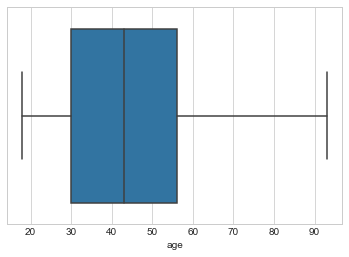

In [13]:
sns.boxplot(customers.age)

### Méthode des interquartiles

In [14]:
## la fonction outliers_describe() a été definie dans la partie " 0.0 - Importation des librairies et declaration de fonctions"
tab_outliers = outliers_describe(customers.age)
tab_outliers

,sub,values
0,IQR,26.0
1,Borne superieure,95.0
2,Borne inferieure,-9.0
3,Nombre de valeurs extremes,0.0
4,percentage de valeurs extremes,0.0


<div class="alert alert-block alert-info">
 <br>La plage d'age (18ans-93ans) est raisonnable.Pas vraiment de valeures atypiques</br>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="2014"> D- Verification du formatage</a></h3>
</div>

In [15]:
customers.head()

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


In [16]:
customers.sex.unique()

array(['f', 'm'], dtype=object)

<div class="alert alert-block alert-info">
 <br>Nous avons  feminin (f) , masculin (m).Ce qui parait correcte.</br>
</div>

<div class="alert alert-block alert-info">
 <br>Nous pouvons constater que client_id commence par la lettre 'c' suivi d'un tiret de 8 puis d'un nombre entier</br>
 <br>Nous creons une fonction pour recuperer le premier caractere de client_id , puis nous verifirons si nous n'avons pas d'erreur de formattage dans la colonne client_id</br>
</div>

In [17]:
## la fonction character() a été definie dans la partie " 0.0 - Importation des librairies et declaration de fonctions"
customers["s_idclient"] = [character(s) for s in customers["client_id"]]
customers.s_idclient.value_counts()

c     8621
ct       2
Name: s_idclient, dtype: int64

In [18]:
customers.loc[customers["s_idclient"]== "ct",:]

,client_id,sex,birth,age,s_idclient
2735,ct_0,f,2001,21,ct
8494,ct_1,m,2001,21,ct


In [19]:
customers = customers.mask(customers["s_idclient"]== "ct")

In [20]:
customers.loc[customers["s_idclient"]== "ct",:]

,client_id,sex,birth,age,s_idclient


<div class="alert alert-block alert-info">
 <br>Nous avons remarqué 2 entrées avec une erreur sur le client_id.</br>
 <br>Nous les avons retiré des données clients.</br>
</div>

In [21]:
customers.isnull().mean()

client_id     0.000232
sex           0.000232
birth         0.000232
age           0.000232
s_idclient    0.000232
dtype: float64

In [22]:
customers.loc[customers.client_id.isnull(),:]

,client_id,sex,birth,age,s_idclient
2735,NaN,NaN,NaN,NaN,NaN
8494,NaN,NaN,NaN,NaN,NaN


In [23]:
customers.dropna(inplace=True)

In [24]:
customers.loc[customers.client_id.isnull(),:]

,client_id,sex,birth,age,s_idclient


In [25]:
customers.to_csv("./DATA/cleaned/customers_clean.csv", index = False)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">Partie 2 - LES PRODUITS</h2>
</div>

In [26]:
products = pd.read_csv("./DATA/sources/products.csv")
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [27]:
products.shape

(3287, 3)

In [28]:
products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="2021">A- Recherche de doublons</a></h3>
</div>

In [29]:
products.duplicated().value_counts()

False    3287
dtype: int64

In [30]:
products.id_prod.nunique()

3287

<div class="alert alert-block alert-info">
 <br>Nous n'avons pas de doublons dans la base de données des produits</br>
 <br>De plus nous pouvons considérer la colonne id_prod comme clé primaire</br>
</div>


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="2022"> B- Recherche de valeurs manquantes</a></h3>
</div>

In [31]:
products.isnull().mean()

id_prod    0.0
price      0.0
categ      0.0
dtype: float64

<div class="alert alert-block alert-info">
 Nous n'avons pas de valeurs manquantes dans la table des produits
</div>


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="2023"> C- Recherche de valeurs extrêmes</a></h3>
</div>

In [32]:
products.price.describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

<div class="alert alert-block alert-danger">
<br>Le tableau de description ci dessus nous laisse voir que le minimun de prix est -1 .</br>
<br>Il existerait donc dans la base de données, des produits avec des prix negatifs.Ce sont des valeures aberrantes</br>
<br>On les supprime pour mieux analyser le catalogue produits.</br>
</div>

In [33]:
products.loc[products.price<=0,:]

,id_prod,price,categ
731,T_0,-1.0,0


In [34]:
products = products[products.price>0]
products.price.describe()

count    3286.000000
mean       21.863597
std        29.849786
min         0.620000
25%         6.990000
50%        13.075000
75%        22.990000
max       300.000000
Name: price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

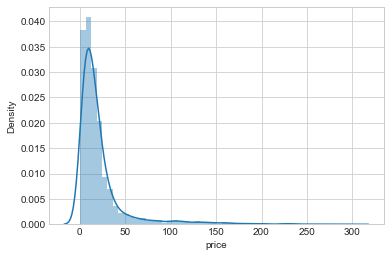

In [35]:
sns.distplot(products.price)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

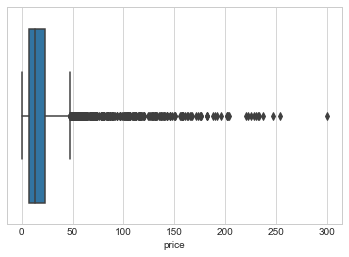

In [36]:
sns.boxplot(products.price)

### Méthode des interquartiles

In [37]:
## la fonction outliers_describe() a été definie dans la partie " 0.0 - Importation des librairies et declaration de fonctions"
describe_outliers = outliers_describe(products.price)
describe_outliers

,sub,values
0,IQR,16.000000
1,Borne superieure,46.990000
2,Borne inferieure,-17.010000
3,Nombre de valeurs extremes,302.000000
4,percentage de valeurs extremes,9.190505


In [38]:
## la fonction outliers_sup() a été definie dans la partie " 0.0 - Importation des librairies et declaration de fonctions"
outliers_sups = outliers_sup(products.price)


In [39]:
#On regarde les produits aux prix extrêmes superieurs
produits_extremes = products.loc[products.price>describe_outliers.iloc[1,1] ,:]
produits_extremes

,id_prod,price,categ
10,2_228,225.17,2
11,1_178,51.92,1
38,2_100,72.11,2
49,1_48,47.22,1
64,2_89,107.99,2
...,...,...,...
3267,2_101,63.99,2
3269,1_543,51.99,1
3271,2_123,147.99,2
3279,1_331,55.99,1


In [40]:
produits_extremes.categ.value_counts()

2    224
1     78
Name: categ, dtype: int64

<div class="alert alert-block alert-info">
 On peut constater que les produits au prix extremes sont de categorie 1 ou 2 .
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="2024"> D- Verification du formatage</a></h3>
</div>

In [41]:
## la fonction character() a été definie dans la partie " 0.0 - Importation des librairies et declaration de fonctions"

products['s_idprod'] = [character(i) for i in products["id_prod"]]
products.head()

,id_prod,price,categ,s_idprod
0,0_1421,19.99,0,0
1,0_1368,5.13,0,0
2,0_731,17.99,0,0
3,1_587,4.99,1,1
4,0_1507,3.99,0,0


In [42]:
products.dtypes

id_prod      object
price       float64
categ         int64
s_idprod     object
dtype: object

In [43]:
products.s_idprod = products.s_idprod.astype('int64')

In [44]:
products.dtypes

id_prod      object
price       float64
categ         int64
s_idprod      int64
dtype: object

In [45]:
products.s_idprod.isnull().mean()

0.0

In [46]:
## Multiple verification de la correspondance entre la categorie et le premier caractère de ID du produit .
verif1 = products.s_idprod.equals(products.categ)
verif2 = all(products.s_idprod==products.categ)
verif3 = products.s_idprod.compare(products.categ,keep_equal=False).value_counts().sum()
print(verif1,verif2,verif3)

True True 0


In [47]:
products = products[['id_prod', 'price', 'categ']]
products.to_csv("./DATA/cleaned/products_clean.csv", index = False)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em"><a id="203">Partie 3 - LES TRANSACTIONS</a></h2>
</div>

In [48]:
transactions = pd.read_csv("./DATA/sources/transactions.csv")
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [49]:
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="2031">A- agregation des données</a></h3>
</div>

#### Jointure entre products et transactions



In [50]:
# products_transactions est la table resultante de la jointure entre la tables products et la table transactions
products_transactions = products.merge(transactions, on = 'id_prod',how='outer',indicator=True)

In [51]:
# analyse de la jointure
df = products_transactions[products_transactions['_merge']!='both']
print(df.shape)


(442, 7)


In [52]:
df[df._merge=='left_only']

,id_prod,price,categ,date,session_id,client_id,_merge
39705,0_1016,35.06,0.0,NaN,NaN,NaN,left_only
62805,0_1780,1.67,0.0,NaN,NaN,NaN,left_only
162765,0_1062,20.08,0.0,NaN,NaN,NaN,left_only
177522,0_1119,2.99,0.0,NaN,NaN,NaN,left_only
181172,0_1014,1.15,0.0,NaN,NaN,NaN,left_only
188021,1_0,31.82,1.0,NaN,NaN,NaN,left_only
230468,0_1318,20.92,0.0,NaN,NaN,NaN,left_only
253465,0_1800,22.05,0.0,NaN,NaN,NaN,left_only
290409,0_1645,2.99,0.0,NaN,NaN,NaN,left_only
320861,0_322,2.99,0.0,NaN,NaN,NaN,left_only


In [53]:
produits_invendus = np.array(df[df._merge=='left_only'].id_prod)
produits_invendus

array(['0_1016', '0_1780', '0_1062', '0_1119', '0_1014', '1_0', '0_1318',
       '0_1800', '0_1645', '0_322', '0_1620', '0_1025', '2_87', '1_394',
       '2_72', '0_310', '0_1624', '2_86', '0_299', '0_510', '0_2308'],
      dtype=object)

<div class="alert alert-block alert-danger">
On peut constater que certains produits n'ont pas été vendus durant la periode considérée . 
</div>

In [54]:
df[df._merge=='right_only']

,id_prod,price,categ,date,session_id,client_id,_merge
679132,0_2245,NaN,NaN,2022-09-23 07:22:38.636773,s_272266,c_4746,right_only
679133,0_2245,NaN,NaN,2022-07-23 09:24:14.133889,s_242482,c_6713,right_only
679134,0_2245,NaN,NaN,2022-12-03 03:26:35.696673,s_306338,c_5108,right_only
679135,0_2245,NaN,NaN,2021-08-16 11:33:25.481411,s_76493,c_1391,right_only
679136,0_2245,NaN,NaN,2022-07-16 05:53:01.627491,s_239078,c_7954,right_only
...,...,...,...,...,...,...,...
679548,T_0,NaN,NaN,test_2021-03-01 02:30:02.237417,s_0,ct_0,right_only
679549,T_0,NaN,NaN,test_2021-03-01 02:30:02.237427,s_0,ct_1,right_only
679550,T_0,NaN,NaN,test_2021-03-01 02:30:02.237449,s_0,ct_1,right_only
679551,T_0,NaN,NaN,test_2021-03-01 02:30:02.237424,s_0,ct_1,right_only


<div class="alert alert-block alert-danger">
On peut constater que certains produits vendus ne sont pas dans la base de données de produits .
</div> 

In [55]:
df[df._merge=='right_only'].id_prod.value_counts()

0_2245    221
T_0       200
Name: id_prod, dtype: int64

In [56]:
products_transactions = products.merge(transactions, on = 'id_prod',how='right')

In [57]:
products_transactions

,id_prod,price,categ,date,session_id,client_id
0,0_1518,4.18,0.0,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,15.99,1.0,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,7.99,0.0,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,69.99,2.0,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,4.99,0.0,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...,...,...
679527,0_1551,12.99,0.0,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,10.99,1.0,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,12.99,0.0,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,4.98,0.0,2021-07-16 20:36:35.350579,s_63204,c_2227


#### Jointure entre products_transactions et customers

In [58]:
products_transactions_customers = products_transactions.merge(customers, on="client_id",how='outer',indicator=True)

In [59]:

# analyse de la jointure
df2 = products_transactions_customers[products_transactions_customers['_merge']!='both']
print(df2.shape)
df2.head()

(221, 11)


,id_prod,price,categ,date,session_id,client_id,sex,birth,age,s_idclient,_merge
309439,T_0,NaN,NaN,test_2021-03-01 02:30:02.237419,s_0,ct_0,NaN,NaN,NaN,NaN,left_only
309440,T_0,NaN,NaN,test_2021-03-01 02:30:02.237425,s_0,ct_0,NaN,NaN,NaN,NaN,left_only
309441,T_0,NaN,NaN,test_2021-03-01 02:30:02.237436,s_0,ct_0,NaN,NaN,NaN,NaN,left_only
309442,T_0,NaN,NaN,test_2021-03-01 02:30:02.237430,s_0,ct_0,NaN,NaN,NaN,NaN,left_only
309443,T_0,NaN,NaN,test_2021-03-01 02:30:02.237449,s_0,ct_0,NaN,NaN,NaN,NaN,left_only


In [60]:
products_transactions_customers._merge.value_counts()

both          679332
left_only        200
right_only        21
Name: _merge, dtype: int64

In [61]:
products_transactions_customers[products_transactions_customers._merge=='left_only']

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,s_idclient,_merge
309439,T_0,NaN,NaN,test_2021-03-01 02:30:02.237419,s_0,ct_0,NaN,NaN,NaN,NaN,left_only
309440,T_0,NaN,NaN,test_2021-03-01 02:30:02.237425,s_0,ct_0,NaN,NaN,NaN,NaN,left_only
309441,T_0,NaN,NaN,test_2021-03-01 02:30:02.237436,s_0,ct_0,NaN,NaN,NaN,NaN,left_only
309442,T_0,NaN,NaN,test_2021-03-01 02:30:02.237430,s_0,ct_0,NaN,NaN,NaN,NaN,left_only
309443,T_0,NaN,NaN,test_2021-03-01 02:30:02.237449,s_0,ct_0,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...
517697,T_0,NaN,NaN,test_2021-03-01 02:30:02.237420,s_0,ct_1,NaN,NaN,NaN,NaN,left_only
517698,T_0,NaN,NaN,test_2021-03-01 02:30:02.237427,s_0,ct_1,NaN,NaN,NaN,NaN,left_only
517699,T_0,NaN,NaN,test_2021-03-01 02:30:02.237449,s_0,ct_1,NaN,NaN,NaN,NaN,left_only
517700,T_0,NaN,NaN,test_2021-03-01 02:30:02.237424,s_0,ct_1,NaN,NaN,NaN,NaN,left_only


<div class="alert alert-block alert-danger">
Nous avons des transactions qui ne correspondent pas à des achats de clients réels . Des données de tests probablement comme peut
le suggerer l'indication devant les dates .
 </div>

In [62]:
products_transactions_customers[products_transactions_customers._merge=='right_only']

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,s_idclient,_merge
679532,NaN,NaN,NaN,NaN,NaN,c_8253,f,2001.0,21.0,c,right_only
679533,NaN,NaN,NaN,NaN,NaN,c_3789,f,1997.0,25.0,c,right_only
679534,NaN,NaN,NaN,NaN,NaN,c_4406,f,1998.0,24.0,c,right_only
679535,NaN,NaN,NaN,NaN,NaN,c_2706,f,1967.0,55.0,c,right_only
679536,NaN,NaN,NaN,NaN,NaN,c_3443,m,1959.0,63.0,c,right_only
679537,NaN,NaN,NaN,NaN,NaN,c_4447,m,1956.0,66.0,c,right_only
679538,NaN,NaN,NaN,NaN,NaN,c_3017,f,1992.0,30.0,c,right_only
679539,NaN,NaN,NaN,NaN,NaN,c_4086,f,1992.0,30.0,c,right_only
679540,NaN,NaN,NaN,NaN,NaN,c_6930,m,2004.0,18.0,c,right_only
679541,NaN,NaN,NaN,NaN,NaN,c_4358,m,1999.0,23.0,c,right_only


In [63]:
np.array(products_transactions_customers[products_transactions_customers._merge=='right_only'].client_id)

array(['c_8253', 'c_3789', 'c_4406', 'c_2706', 'c_3443', 'c_4447',
       'c_3017', 'c_4086', 'c_6930', 'c_4358', 'c_8381', 'c_1223',
       'c_6862', 'c_5245', 'c_5223', 'c_6735', 'c_862', 'c_7584', 'c_90',
       'c_587', 'c_3526'], dtype=object)

<div class="alert alert-block alert-danger">
On peut constater que certains clients n'ont effectués aucun achat durant la periode considerée.
    Ce sont les clients : c_8253, c_3789, c_4406, c_2706, c_3443, c_4447,
       c_3017, c_4086, c_6930, c_4358, c_8381, c_1223,
       c_6862, c_5245, c_5223, c_6735, c_862, c_7584, c_90,
       c_587, c_3526 .
 </div>

In [64]:
products_transactions_customers = products_transactions.merge(customers,on="client_id",how='inner')

In [65]:
data=products_transactions_customers.copy()
data.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,s_idclient
0,0_1518,4.18,0.0,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,36.0,c
1,0_1627,3.99,0.0,2022-06-18 05:55:31.816994,s_225494,c_103,f,1986.0,36.0,c
2,0_1104,13.21,0.0,2023-02-08 17:31:06.898425,s_338755,c_103,f,1986.0,36.0,c
3,0_1390,19.37,0.0,2021-04-20 06:18:39.939761,s_23078,c_103,f,1986.0,36.0,c
4,0_1547,8.99,0.0,2022-03-15 19:54:53.904123,s_179629,c_103,f,1986.0,36.0,c


In [66]:
data.duplicated().value_counts()

False    679332
dtype: int64

In [67]:
data.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,s_idclient
0,0_1518,4.18,0.0,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,36.0,c
1,0_1627,3.99,0.0,2022-06-18 05:55:31.816994,s_225494,c_103,f,1986.0,36.0,c
2,0_1104,13.21,0.0,2023-02-08 17:31:06.898425,s_338755,c_103,f,1986.0,36.0,c
3,0_1390,19.37,0.0,2021-04-20 06:18:39.939761,s_23078,c_103,f,1986.0,36.0,c
4,0_1547,8.99,0.0,2022-03-15 19:54:53.904123,s_179629,c_103,f,1986.0,36.0,c


In [68]:
data.dtypes

id_prod        object
price         float64
categ         float64
date           object
session_id     object
client_id      object
sex            object
birth         float64
age           float64
s_idclient     object
dtype: object

In [69]:
data["date"] = pd.to_datetime(data["date"])
data["categ"] = data["categ"].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   price       679111 non-null  float64       
 2   categ       679111 non-null  float64       
 3   date        679332 non-null  datetime64[ns]
 4   session_id  679332 non-null  object        
 5   client_id   679332 non-null  object        
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  float64       
 8   age         679332 non-null  float64       
 9   s_idclient  679332 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 57.0+ MB


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="2032">B- Recherche de valeurs manquantes</a></h3>
</div>

In [70]:
data.isnull().mean()

id_prod       0.000000
price         0.000325
categ         0.000325
date          0.000000
session_id    0.000000
client_id     0.000000
sex           0.000000
birth         0.000000
age           0.000000
s_idclient    0.000000
dtype: float64

<div class="alert alert-block alert-danger">
 <br>Nous constatons des valeurs manquantes dans la colonne "price" et "categ" </br>
</div>

In [71]:
data.loc[data.price.isnull(),:]

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,s_idclient
893,0_2245,NaN,NaN,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968.0,54.0,c
2001,0_2245,NaN,NaN,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968.0,54.0,c
2359,0_2245,NaN,NaN,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968.0,54.0,c
6798,0_2245,NaN,NaN,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968.0,54.0,c
7368,0_2245,NaN,NaN,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968.0,54.0,c
...,...,...,...,...,...,...,...,...,...,...
632394,0_2245,NaN,NaN,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986.0,36.0,c
648744,0_2245,NaN,NaN,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933.0,89.0,c
672600,0_2245,NaN,NaN,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987.0,35.0,c
672671,0_2245,NaN,NaN,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987.0,35.0,c


In [72]:
data.loc[data.price.isnull(),:].id_prod.value_counts()

0_2245    221
Name: id_prod, dtype: int64

<div class="alert alert-block alert-info">
 <br>Nous avions remarqué precedemment que la categorie du produit correspond au premier caractère de id_prod . </br>
<br>Nous remplirons donc pour le produit d'id_prod 0_2245 la colonne 'categ' par la valeur 0. </br>
<br>Ensuite nous attribuerons la mediane des prix de produits de categorie 0 , a la colonne des prix du produit d'id_prod 0_2245. </br>
<br>Notons entre autre que le produit d'id_prod 0_2245 n'est pas present dans la base de données des produits , nous l'ajouterons. </br>
</div>

In [73]:

data['s_idprod'] = [character(i) for i in data.id_prod]

In [74]:
data.loc[data.categ.isnull(),:]

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,s_idclient,s_idprod
893,0_2245,NaN,NaN,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968.0,54.0,c,0
2001,0_2245,NaN,NaN,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968.0,54.0,c,0
2359,0_2245,NaN,NaN,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968.0,54.0,c,0
6798,0_2245,NaN,NaN,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968.0,54.0,c,0
7368,0_2245,NaN,NaN,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968.0,54.0,c,0
...,...,...,...,...,...,...,...,...,...,...,...
632394,0_2245,NaN,NaN,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986.0,36.0,c,0
648744,0_2245,NaN,NaN,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933.0,89.0,c,0
672600,0_2245,NaN,NaN,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987.0,35.0,c,0
672671,0_2245,NaN,NaN,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987.0,35.0,c,0


In [75]:
data['categ'] = data['s_idprod']

In [76]:
data.loc[data.id_prod=='0_2245',:]

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,s_idclient,s_idprod
893,0_2245,NaN,0,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968.0,54.0,c,0
2001,0_2245,NaN,0,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968.0,54.0,c,0
2359,0_2245,NaN,0,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968.0,54.0,c,0
6798,0_2245,NaN,0,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968.0,54.0,c,0
7368,0_2245,NaN,0,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968.0,54.0,c,0
...,...,...,...,...,...,...,...,...,...,...,...
632394,0_2245,NaN,0,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986.0,36.0,c,0
648744,0_2245,NaN,0,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933.0,89.0,c,0
672600,0_2245,NaN,0,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987.0,35.0,c,0
672671,0_2245,NaN,0,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987.0,35.0,c,0


In [77]:
median_0 = data.loc[data.categ=='0','price'].median()

In [78]:
data.loc[data.id_prod=='0_2245','price'] = median_0

In [79]:
data.isnull().sum()

id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
sex           0
birth         0
age           0
s_idclient    0
s_idprod      0
dtype: int64

<div class="alert alert-block alert-info">
<br>Notons entre autre que le produit d'id_prod 0_2245 n'est pas present dans la base de données des produits , nous l'ajouterons. </br>
</div>

In [80]:
P = data.loc[data.id_prod=='0_2245',{'id_prod','price','categ','s_idprod'}]
P = P.reset_index()
P = P[P.index== 0].loc[:,{'id_prod','price','categ','s_idprod'}]
P

,categ,id_prod,s_idprod,price
0,0,0_2245,0,9.99


In [81]:
products = pd.concat([products,P],axis=0)    #ajout du produit id_prod 0_2245
products.loc[products.id_prod=="0_2245",:]

,id_prod,price,categ,s_idprod
0,0_2245,9.99,0,0


In [82]:
products = products[['id_prod', 'price', 'categ']]

In [83]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [84]:
products.to_csv("./DATA/cleaned/products_clean.csv", index = False)

#### Ajout des colonnes de date

In [85]:
data = data.loc[:,{'id_prod','date','session_id','client_id','price','categ','sex','birth','age'}]
data.head()

,client_id,birth,categ,sex,id_prod,price,session_id,date,age
0,c_103,1986.0,0,f,0_1518,4.18,s_211425,2022-05-20 13:21:29.043970,36.0
1,c_103,1986.0,0,f,0_1627,3.99,s_225494,2022-06-18 05:55:31.816994,36.0
2,c_103,1986.0,0,f,0_1104,13.21,s_338755,2023-02-08 17:31:06.898425,36.0
3,c_103,1986.0,0,f,0_1390,19.37,s_23078,2021-04-20 06:18:39.939761,36.0
4,c_103,1986.0,0,f,0_1547,8.99,s_179629,2022-03-15 19:54:53.904123,36.0


In [86]:
data["month"] = data.date.dt.to_period('M')
data["day"] = data.date.dt.to_period('D')
data.head()

,client_id,birth,categ,sex,id_prod,price,session_id,date,age,month,day
0,c_103,1986.0,0,f,0_1518,4.18,s_211425,2022-05-20 13:21:29.043970,36.0,2022-05,2022-05-20
1,c_103,1986.0,0,f,0_1627,3.99,s_225494,2022-06-18 05:55:31.816994,36.0,2022-06,2022-06-18
2,c_103,1986.0,0,f,0_1104,13.21,s_338755,2023-02-08 17:31:06.898425,36.0,2023-02,2023-02-08
3,c_103,1986.0,0,f,0_1390,19.37,s_23078,2021-04-20 06:18:39.939761,36.0,2021-04,2021-04-20
4,c_103,1986.0,0,f,0_1547,8.99,s_179629,2022-03-15 19:54:53.904123,36.0,2022-03,2022-03-15


#### données manquantes du mois d'octobre pour les produits de categorie 1 .

<Figure size 432x288 with 0 Axes>

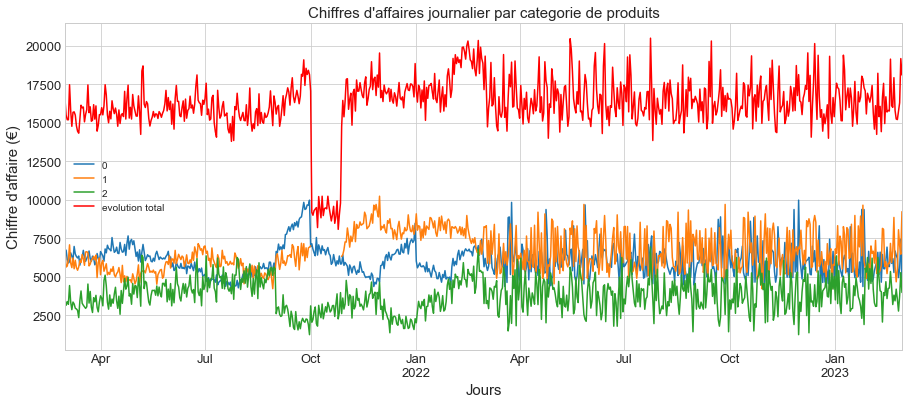

In [87]:
fig = plt.figure()
data.groupby(['day','categ']).sum()["price"].unstack().plot(kind='line',stacked=False,figsize=(15,6))
data.groupby(['day']).sum()["price"].plot(kind='line',color = "red",label="evolution total")
plt.title("Chiffres d'affaires journalier par categorie de produits",fontsize=15)
plt.ylabel("Chiffre d'affaire (€)",fontsize=15)
plt.xlabel('Jours',fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.legend()
plt.show()
#fig.savefig('./GRAPHIQUES/CA_journalier_par_categ.png',dpi=fig.dpi*10)
 # Close the figure to free up memory
#plt.close(fig)

In [88]:
#taux d'evolution du mois d'octobre
taux_evolution_octobre = 100*(data.loc[data.month=='2021-10','price'].sum() - data.loc[data.month=='2021-9','price'].sum())/data.loc[data.month=='2021-10','price'].sum()
print(taux_evolution_octobre,'%')

-58.120940882137255 %


<div class="alert alert-block alert-danger" >
 <br>Le mois d'octobre 2021 affiche une baisse de -58,12% des ventes par rapport au mois precedent. </br>
 <br>On aperçoit clairement une discontinuité de la courbe du chiffre d'affaire journalier des produits de categorie 1, Ici tracée en couleur orange </br>
    <br>La periode de discontinuité de la courbe des ventes des produits de categorie 1 correspond parfaitement a la periode de baisse global du chiffre d'affaire marqué ici en couleur rouge sur la courbe.</br>
<br>Cette discontinuité s'explique par l'absence d'enregistrements de transactions sur la periode du 02 octobre 2021 au 28 octobre 2021 pour les produits de categorie 1 .</br>
<br>Nous effectuerons nos analyses sans ces données . </br>
<br>Cependant pour le calcul du chiffre d'affaire , nous affecterons la mediane des chiffres d'affaire mensuels pour la categorie 1 des mois precedent , au mois d'octobre 2021 . </br>

</div>

In [89]:
data_save = data.copy()
#data = data.loc[(data.month !='2021-10')]  # retranche les données du mois d'octobre
data.sort_values(by=['date'],axis=0,inplace=True)
data.set_index('date',inplace=True)
data.head()

,client_id,birth,categ,sex,id_prod,price,session_id,age,month,day
date,,,,,,,,,,
2021-03-01 00:01:07.843138,c_329,1967.0,0,f,0_1259,11.99,s_1,55.0,2021-03,2021-03-01
2021-03-01 00:02:26.047414,c_664,1960.0,0,m,0_1390,19.37,s_2,62.0,2021-03,2021-03-01
2021-03-01 00:02:38.311413,c_580,1988.0,0,m,0_1352,4.50,s_3,34.0,2021-03,2021-03-01
2021-03-01 00:04:54.559692,c_7912,1989.0,0,f,0_1458,6.55,s_4,33.0,2021-03,2021-03-01
2021-03-01 00:05:18.801198,c_2033,1956.0,0,f,0_1358,16.49,s_5,66.0,2021-03,2021-03-01


In [90]:
 data.loc[(data.month =='2021-10')]

,client_id,birth,categ,sex,id_prod,price,session_id,age,month,day
date,,,,,,,,,,
2021-10-01 00:00:23.722317,c_5907,1991.0,0,f,0_1145,6.99,s_98170,31.0,2021-10,2021-10-01
2021-10-01 00:03:07.095422,c_7614,1995.0,1,m,1_622,17.41,s_98169,27.0,2021-10,2021-10-01
2021-10-01 00:03:16.664480,c_4492,1980.0,1,f,1_202,19.96,s_98171,42.0,2021-10,2021-10-01
2021-10-01 00:06:04.960675,c_2588,1989.0,0,m,0_2268,17.57,s_98172,33.0,2021-10,2021-10-01
2021-10-01 00:07:50.987959,c_5953,1986.0,0,m,0_1421,19.99,s_98173,36.0,2021-10,2021-10-01
...,...,...,...,...,...,...,...,...,...,...
2021-10-31 23:42:55.889671,c_6259,1991.0,0,m,0_1108,17.45,s_112940,31.0,2021-10,2021-10-31
2021-10-31 23:48:14.590919,c_1609,1980.0,1,m,1_414,23.83,s_112948,42.0,2021-10,2021-10-31
2021-10-31 23:51:26.167675,c_1767,1983.0,0,f,0_1425,12.99,s_112949,39.0,2021-10,2021-10-31


In [91]:
data.to_csv("./DATA/cleaned/in_data.csv")

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="2033">C- Dataframe pour les paniers (les commandes)</a></h3>
</div>

In [92]:
data = data.reset_index()
data.head()

,date,client_id,birth,categ,sex,id_prod,price,session_id,age,month,day
0,2021-03-01 00:01:07.843138,c_329,1967.0,0,f,0_1259,11.99,s_1,55.0,2021-03,2021-03-01
1,2021-03-01 00:02:26.047414,c_664,1960.0,0,m,0_1390,19.37,s_2,62.0,2021-03,2021-03-01
2,2021-03-01 00:02:38.311413,c_580,1988.0,0,m,0_1352,4.50,s_3,34.0,2021-03,2021-03-01
3,2021-03-01 00:04:54.559692,c_7912,1989.0,0,f,0_1458,6.55,s_4,33.0,2021-03,2021-03-01
4,2021-03-01 00:05:18.801198,c_2033,1956.0,0,f,0_1358,16.49,s_5,66.0,2021-03,2021-03-01


In [93]:
data.loc[data.session_id.duplicated(),:].head(20)

,date,client_id,birth,categ,sex,id_prod,price,session_id,age,month,day
7,2021-03-01 00:07:48.507530,c_4908,1981.0,0,f,0_279,16.99,s_6,41.0,2021-03,2021-03-01
9,2021-03-01 00:09:29.301897,c_580,1988.0,0,m,0_2245,9.99,s_3,34.0,2021-03,2021-03-01
12,2021-03-01 00:10:37.223732,c_580,1988.0,0,m,0_1638,5.46,s_3,34.0,2021-03,2021-03-01
14,2021-03-01 00:11:57.832228,c_1609,1980.0,0,m,0_1159,7.99,s_7,42.0,2021-03,2021-03-01
16,2021-03-01 00:16:16.649539,c_4908,1981.0,0,f,0_1475,11.99,s_6,41.0,2021-03,2021-03-01
17,2021-03-01 00:16:49.525524,c_2505,1982.0,0,f,0_2056,5.13,s_12,40.0,2021-03,2021-03-01
18,2021-03-01 00:17:11.089942,c_7912,1989.0,1,f,1_310,14.20,s_4,33.0,2021-03,2021-03-01
23,2021-03-01 00:30:18.987867,c_7726,1975.0,0,f,0_1176,7.65,s_15,47.0,2021-03,2021-03-01
24,2021-03-01 00:30:49.807861,c_2505,1982.0,0,f,0_1571,5.99,s_12,40.0,2021-03,2021-03-01
26,2021-03-01 00:33:24.571129,c_5479,1971.0,1,f,1_91,20.99,s_14,51.0,2021-03,2021-03-01


In [94]:
data.loc[data.session_id=='s_3']

,date,client_id,birth,categ,sex,id_prod,price,session_id,age,month,day
2,2021-03-01 00:02:38.311413,c_580,1988.0,0,m,0_1352,4.50,s_3,34.0,2021-03,2021-03-01
9,2021-03-01 00:09:29.301897,c_580,1988.0,0,m,0_2245,9.99,s_3,34.0,2021-03,2021-03-01
12,2021-03-01 00:10:37.223732,c_580,1988.0,0,m,0_1638,5.46,s_3,34.0,2021-03,2021-03-01
30,2021-03-01 00:38:57.630675,c_580,1988.0,0,m,0_1110,4.71,s_3,34.0,2021-03,2021-03-01


In [95]:
achat_session = pd.DataFrame(data.groupby('session_id').sum()['price'])
achat_session = achat_session.reset_index()
achat_session

,session_id,price
0,s_1,11.99
1,s_10,26.99
2,s_100,33.72
3,s_1000,39.22
4,s_10000,41.49
...,...,...
342310,s_99994,28.92
342311,s_99995,19.84
342312,s_99996,56.27
342313,s_99997,6.99


In [96]:
article_session = pd.DataFrame(data.groupby('session_id').count()['id_prod'])
article_session = article_session.reset_index()
article_session

,session_id,id_prod
0,s_1,1
1,s_10,1
2,s_100,2
3,s_1000,4
4,s_10000,3
...,...,...
342310,s_99994,3
342311,s_99995,1
342312,s_99996,4
342313,s_99997,1


In [97]:
achat_article = achat_session.merge(article_session,on="session_id",how='outer',indicator=True)

In [98]:
achat_article.head()

,session_id,price,id_prod,_merge
0,s_1,11.99,1,both
1,s_10,26.99,1,both
2,s_100,33.72,2,both
3,s_1000,39.22,4,both
4,s_10000,41.49,3,both


In [99]:
# analyse de la jointure
df3 = achat_article[achat_article['_merge']!='both']
print(df3.shape)
df3.head()

(0, 4)


,session_id,price,id_prod,_merge


In [100]:
achat_article.loc[achat_article.session_id=='s_3']

,session_id,price,id_prod,_merge
217162,s_3,24.66,4,both


In [101]:
achat_article = achat_session.merge(article_session,on="session_id",how='inner')
achat_article.columns = ['session_id','montant_dupanier','nombre_article']
achat_article

,session_id,montant_dupanier,nombre_article
0,s_1,11.99,1
1,s_10,26.99,1
2,s_100,33.72,2
3,s_1000,39.22,4
4,s_10000,41.49,3
...,...,...,...
342310,s_99994,28.92,3
342311,s_99995,19.84,1
342312,s_99996,56.27,4
342313,s_99997,6.99,1


In [102]:
D = data.loc[:,{'date', 'birth', 'client_id', 'session_id',
       'age', 'sex', 'month', 'day'}]
D.drop_duplicates(subset=['session_id'], keep='first',inplace=True)

D.head()

,day,client_id,birth,sex,month,session_id,date,age
0,2021-03-01,c_329,1967.0,f,2021-03,s_1,2021-03-01 00:01:07.843138,55.0
1,2021-03-01,c_664,1960.0,m,2021-03,s_2,2021-03-01 00:02:26.047414,62.0
2,2021-03-01,c_580,1988.0,m,2021-03,s_3,2021-03-01 00:02:38.311413,34.0
3,2021-03-01,c_7912,1989.0,f,2021-03,s_4,2021-03-01 00:04:54.559692,33.0
4,2021-03-01,c_2033,1956.0,f,2021-03,s_5,2021-03-01 00:05:18.801198,66.0


In [103]:
D.loc[D.session_id.duplicated(),:]

,day,client_id,birth,sex,month,session_id,date,age


In [104]:
data_paniers = achat_article.merge(D, on="session_id",how='outer',indicator=True)
# analyse de la jointure
df4 = data_paniers[data_paniers['_merge']!='both']
print(df4.shape)
df4.head()

(0, 11)


,session_id,montant_dupanier,nombre_article,day,client_id,birth,sex,month,date,age,_merge


In [105]:
data_paniers = achat_article.merge(D,on='session_id',how='inner')
data_paniers.head()

,session_id,montant_dupanier,nombre_article,day,client_id,birth,sex,month,date,age
0,s_1,11.99,1,2021-03-01,c_329,1967.0,f,2021-03,2021-03-01 00:01:07.843138,55.0
1,s_10,26.99,1,2021-03-01,c_2218,1970.0,f,2021-03,2021-03-01 00:10:33.163037,52.0
2,s_100,33.72,2,2021-03-01,c_3854,1978.0,f,2021-03,2021-03-01 04:12:43.572994,44.0
3,s_1000,39.22,4,2021-03-03,c_1014,1989.0,m,2021-03,2021-03-03 02:38:09.568389,33.0
4,s_10000,41.49,3,2021-03-22,c_476,1989.0,f,2021-03,2021-03-22 17:46:05.819130,33.0


In [106]:
data_paniers = data_paniers[["session_id","montant_dupanier","nombre_article","client_id","age","birth","sex","month","day","date"]]
data_paniers.head()

,session_id,montant_dupanier,nombre_article,client_id,age,birth,sex,month,day,date
0,s_1,11.99,1,c_329,55.0,1967.0,f,2021-03,2021-03-01,2021-03-01 00:01:07.843138
1,s_10,26.99,1,c_2218,52.0,1970.0,f,2021-03,2021-03-01,2021-03-01 00:10:33.163037
2,s_100,33.72,2,c_3854,44.0,1978.0,f,2021-03,2021-03-01,2021-03-01 04:12:43.572994
3,s_1000,39.22,4,c_1014,33.0,1989.0,m,2021-03,2021-03-03,2021-03-03 02:38:09.568389
4,s_10000,41.49,3,c_476,33.0,1989.0,f,2021-03,2021-03-22,2021-03-22 17:46:05.819130


In [107]:
data_paniers.duplicated().value_counts()

False    342315
dtype: int64

In [108]:
data_paniers.to_csv('./DATA/cleaned/data_paniers.csv',index=False)

In [109]:
data.head(10)

,date,client_id,birth,categ,sex,id_prod,price,session_id,age,month,day
0,2021-03-01 00:01:07.843138,c_329,1967.0,0,f,0_1259,11.99,s_1,55.0,2021-03,2021-03-01
1,2021-03-01 00:02:26.047414,c_664,1960.0,0,m,0_1390,19.37,s_2,62.0,2021-03,2021-03-01
2,2021-03-01 00:02:38.311413,c_580,1988.0,0,m,0_1352,4.50,s_3,34.0,2021-03,2021-03-01
3,2021-03-01 00:04:54.559692,c_7912,1989.0,0,f,0_1458,6.55,s_4,33.0,2021-03,2021-03-01
4,2021-03-01 00:05:18.801198,c_2033,1956.0,0,f,0_1358,16.49,s_5,66.0,2021-03,2021-03-01
5,2021-03-01 00:05:44.999018,c_4908,1981.0,0,f,0_1073,13.99,s_6,41.0,2021-03,2021-03-01
6,2021-03-01 00:07:04.371179,c_1609,1980.0,0,m,0_1304,5.86,s_7,42.0,2021-03,2021-03-01
7,2021-03-01 00:07:48.507530,c_4908,1981.0,0,f,0_279,16.99,s_6,41.0,2021-03,2021-03-01
8,2021-03-01 00:09:11.523122,c_7991,1968.0,1,m,1_445,23.99,s_8,54.0,2021-03,2021-03-01
9,2021-03-01 00:09:29.301897,c_580,1988.0,0,m,0_2245,9.99,s_3,34.0,2021-03,2021-03-01


In [110]:
data.shape

(679332, 11)

In [111]:
customers.shape

(8621, 5)

In [112]:
products.shape

(3287, 3)

In [113]:
data_paniers.shape

(342315, 10)

<div class="alert alert-block alert-info">
<br>En somme , quatre dataframes ont étés obtenus a partir des données fournis:</br>
 <br>-'customers_clean' 8621 lignes , 5 colonnes pour les clients.</br>
 <br>-'products_clean' 3287 lignes , 3 colonnes pour les produits.</br>
 <br>-'data' 679332 ligne, 11 colonnes pour les transactions.</br>
 <br>-'data_paniers' 342315 ligne, 10 colonnes pour les paniers (commandes).</br>
 <br>A partir de la base de données des clients fournie , nous avons pu obtenir le dataframe 'customers_clean' après suppression d'entrées contenant une erreurs de formatage sur client_id . </br>
<br>Le second dataframe extrait , produits_clean a été obtenu en supprimant les entrées ayant des valeurs aberantes dans la colonne 'prix'.</br>
<br>Le dataframe 'data' a été obtenu apres deux jointures successives entre les données 'transactions' et 'produit_clean', puis entre le resultat de cette jointure et 'customers_clean'.Aussi, 200 entrées de test on été supprimées  et la mediane des prix de produits de categorie 0 a été imputé au prix manquant du produit d'id_prod 0_2245  . Et la categorie 0 lui a été attribué</br>
<br>Le quatrieme dataframe, 'data_paniers' a été obtenu a partir du dataframe 'data' par des agregations et jointures   .</br>

</div>

[RETOUR AU PLAN](#200)